In [1]:
import os 
import torch
import random
from diffusers import StableDiffusionPipeline
from safetensors.torch import load_file
from copy import deepcopy
torch.enable_grad(False)

/share/u/rohit/.conda/envs/visdiff/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/share/u/rohit/.conda/envs/visdiff/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")


<function torch.utils._contextlib.context_decorator.<locals>.decorate_context>

In [20]:
torch_dtype = torch.bfloat16
device = 'cuda:0'
basemodel_id="CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionPipeline.from_pretrained(basemodel_id, torch_dtype=torch_dtype, use_safetensors=True, safety_checker=None).to(device)
original_weights = deepcopy(pipe.unet.state_dict())
esd_weights = load_file("../esd-models/sd/esd-golden_retriever-from-golden_retriever-esdu.safetensors")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [21]:
num_inference_steps = 20
guidance_scale = 7.5
height=width=512

  0%|          | 0/20 [00:00<?, ?it/s]

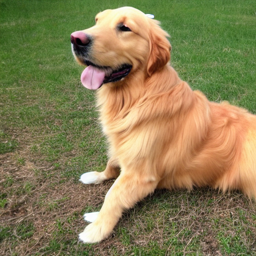

In [30]:
# Generate with original model
prompt = 'image of a golden retriever'
seed = random.randint(0, 2**15)


pipe.unet.load_state_dict(original_weights, strict=False)
image = pipe(prompt, 
             num_inference_steps = num_inference_steps,
             guidance_scale= guidance_scale,
             height=height,
             width=width,
             generator=torch.Generator().manual_seed(seed)
            ).images
image[0].resize((256,256))

  0%|          | 0/20 [00:00<?, ?it/s]

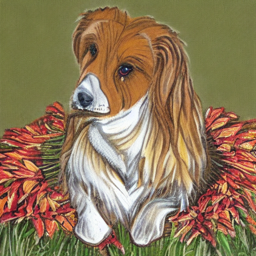

In [31]:
# Generate with ESD model
pipe.unet.load_state_dict(esd_weights, strict=False)
image = pipe(prompt, 
             num_inference_steps = num_inference_steps,
             guidance_scale= guidance_scale,
             height=height,
             width=width,
             generator=torch.Generator().manual_seed(seed)
            ).images
image[0].resize((256,256))